Predict House Sale Price:

This Dataset contains House Price Data. The Target/response variable is the Sale Price. The Predictors are many in numbers.

The Data can be found here :

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The idea is to calculate the sales price based on various parameters. The dataset comes with Train and Test Data separetly. As can be seen below this dataset is extremely rich and I think I will use this data set throughout the weekly assignment wherever I see it is appropriate.

In this excerise, my primary goal was to create a Linear Regression Model by using Feature Selection on Train Data and then predict prices for Test Data. To select features I have depended upon correlation using Pearson method. Finally used Scikit Learn to develop the Linear Regression. 


In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

Load the Train and Test Datasets

In [39]:
train_Data = pd.read_csv('Input/train.csv')
test_Data = pd.read_csv('Input/test.csv')

In [40]:
train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [41]:
#keeping for future iteration.

target = train_Data["SalePrice"]

all_Data = pd.concat([train_Data, test_Data], ignore_index=True)

Below is a EDA on Sales Prices based on the living area square fit. Over the years of personal experience with house rents and couple of attempts to own my house has given me this basic knowledge, with more area, we have to pay more prices. Of course things gets intersting with other variables.

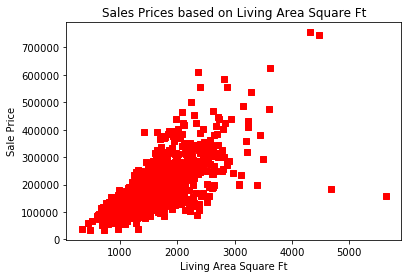

In [42]:
plt.scatter(train_Data['GrLivArea'], train_Data['SalePrice'], c = 'Red', marker = "s")
plt.title("Sales Prices based on Living Area Square Ft")
plt.ylabel("Sale Price")
plt.xlabel("Living Area Square Ft")
plt.show()

As can be seen above there are some outliers present in terms of sales price which may distors the norms. we can remove them.

In [43]:
train_Data = train_Data[train_Data['GrLivArea'] < 4500]

In [44]:
train_Data['SalePrice'].corr(train_Data['GrLivArea'])

0.73496816453593272

Lets review the Null Values here

In [46]:
nullValues = pd.isnull(all_Data).sum()

In [48]:
nullValues[nullValues>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

There are many variables having null values in thousands. I am not sure if any Data Wrangling here will neccesailry make any impacts. so we will drop those columns where nulls are significanty high(+1000) in next step.

In [52]:
train_Data=train_Data.drop("Alley",1)
train_Data=train_Data.drop("Fence",1)
train_Data=train_Data.drop("FireplaceQu",1)
train_Data=train_Data.drop("MiscFeature",1)
train_Data=train_Data.drop("PoolQC",1)

However it is premature idea to think this problem as Simple Linear Rigression. As can be seen there are 80 Columns/predictors present in the dataset, so lets first check the Corelation between predictors. I have used pearson method as that is most commonly used and it computes the linear associatio between two continuos variables.

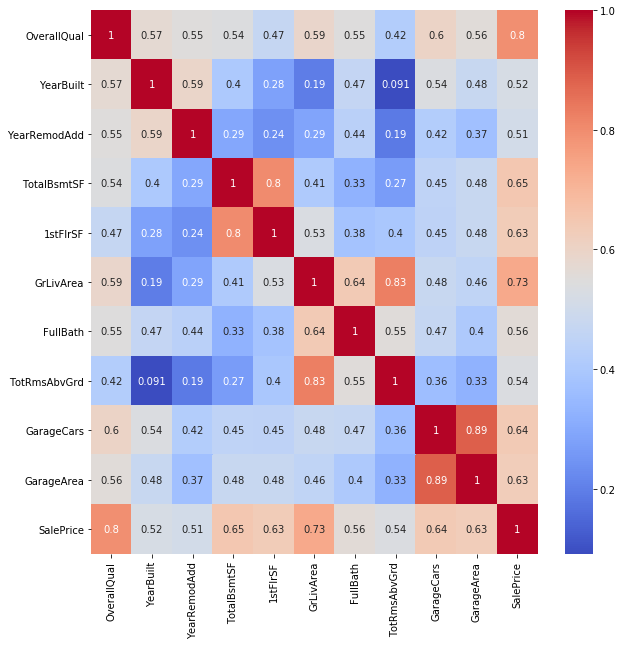

In [59]:
corrmat = train_Data.corr(method='pearson')
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_Data[top_corr_features].corr(),annot=True,cmap="coolwarm")

Now it is intresting. As we can see the Sale Price is heavily correlated with multiple variables.

Below is some analysis on how each variable is performing with other variables.

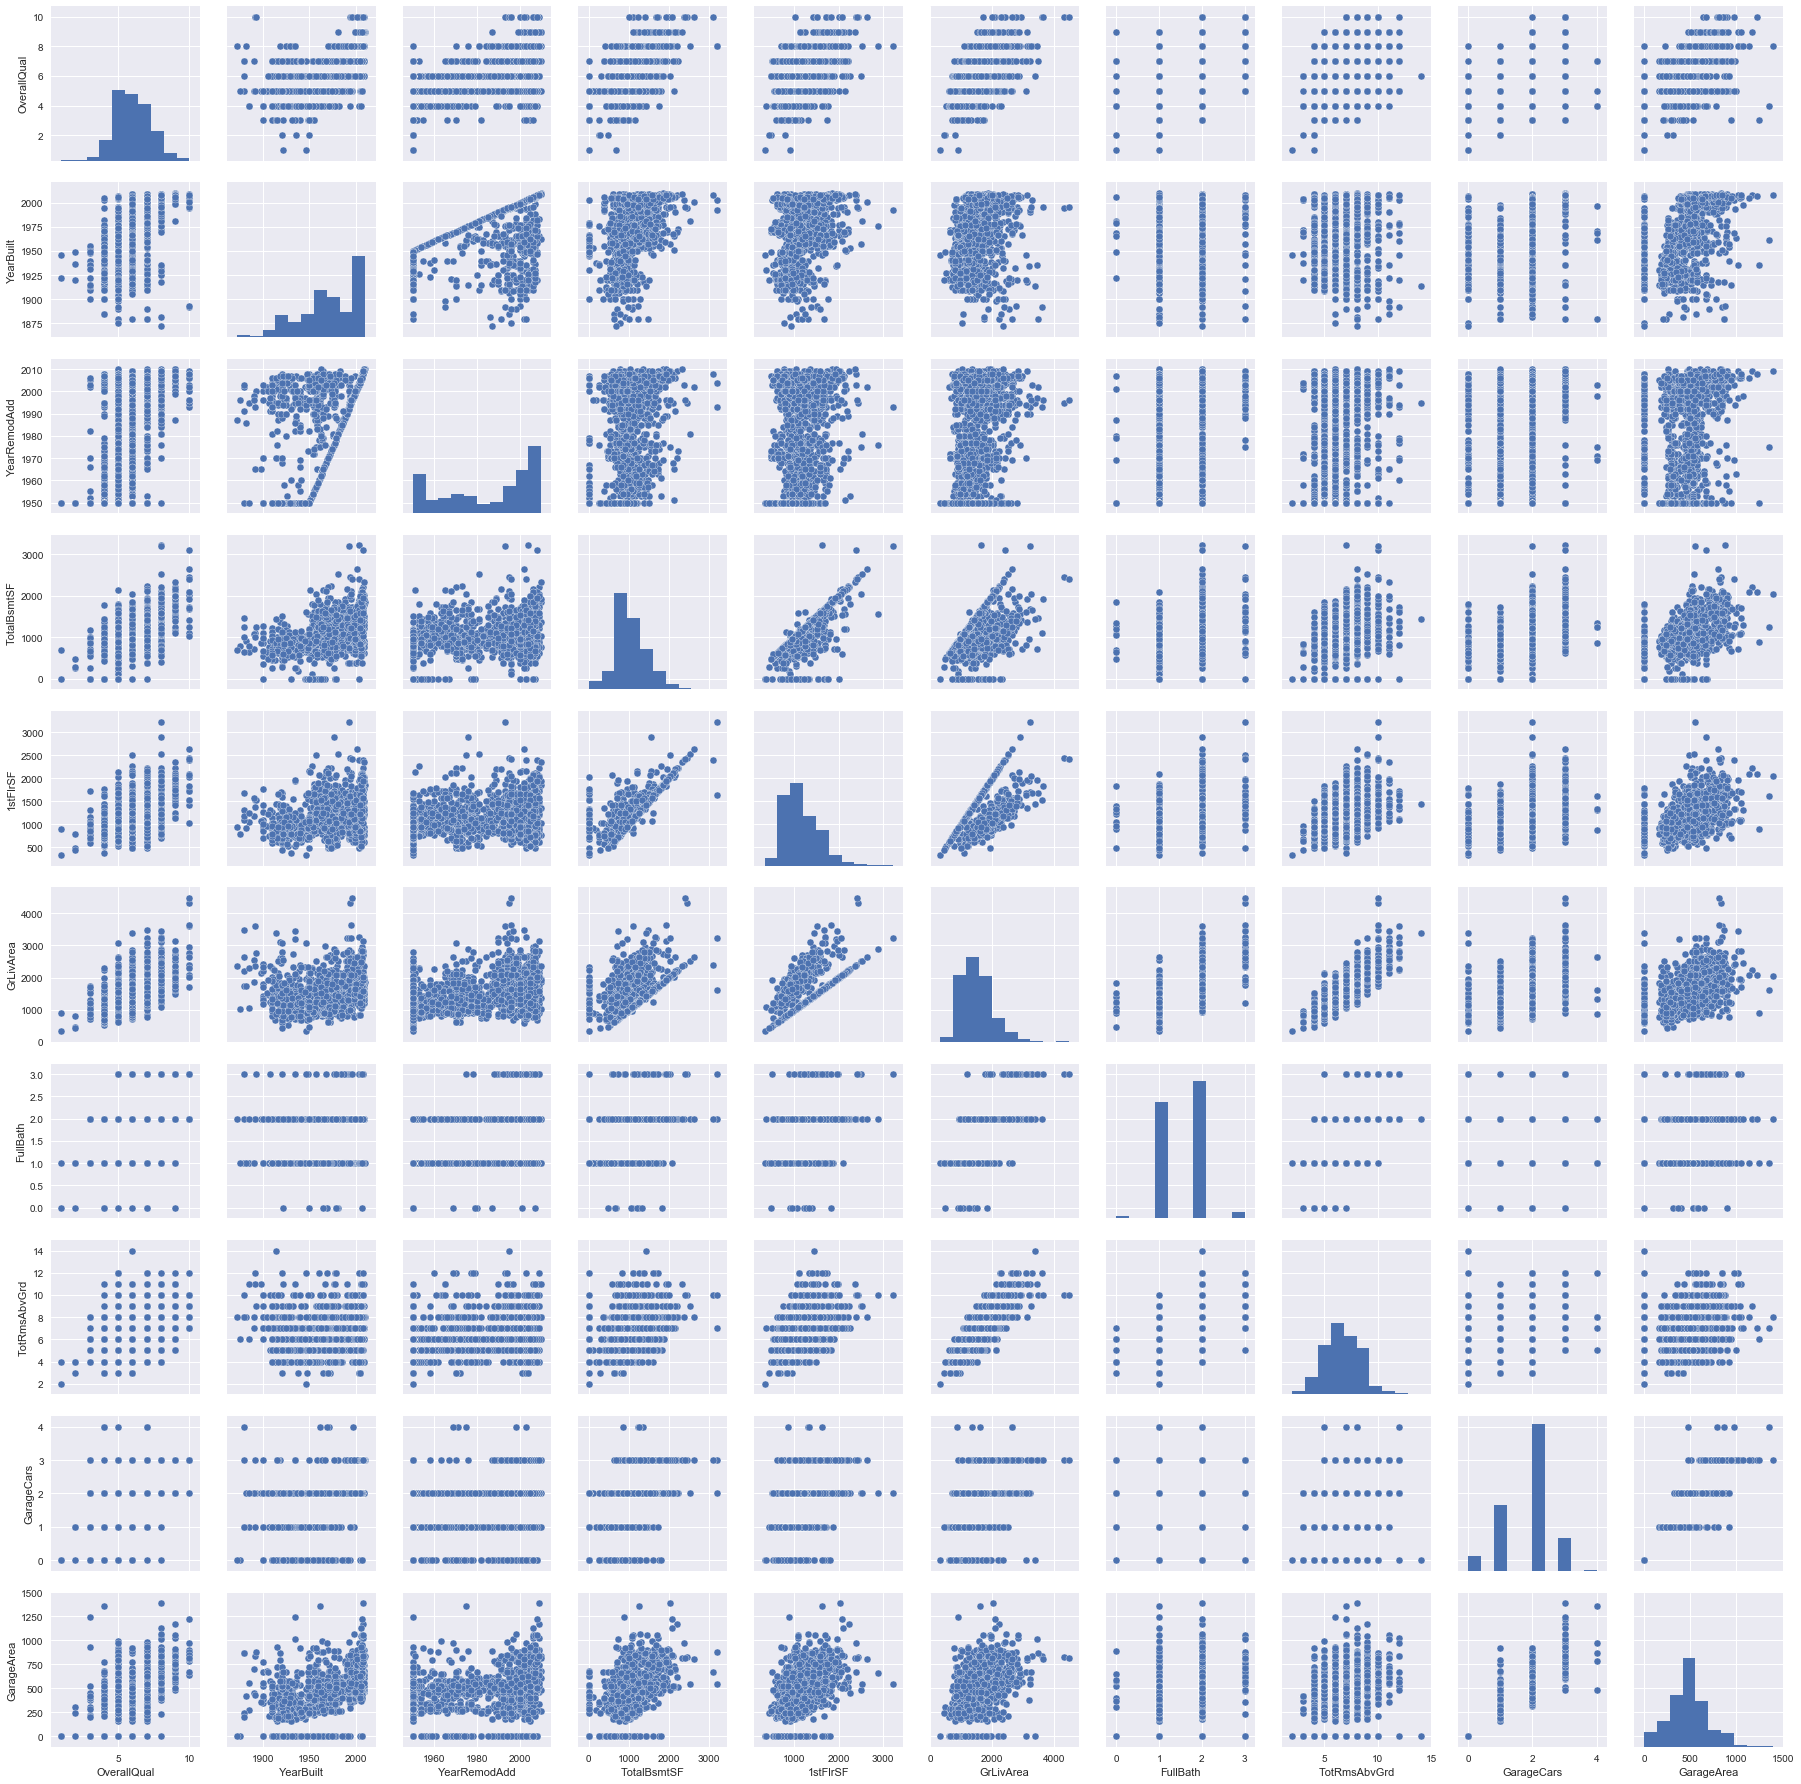

In [75]:
top_Predictors = train_Data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

target = train_Data[['SalePrice']]

sns.set()
sns.pairplot(top_Predictors, size =2.5)
plt.show()

In [66]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

model = lm.fit(top_Predictors,target)

In [82]:
test_Features = test_Data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

Below performing some data wrangling on Train Data where there is Nan Values exists before fitting in this model.

In [85]:
nanValues = pd.isnull(test_Features).sum()
nanValues[nanValues>0]

TotalBsmtSF    1
GarageCars     1
GarageArea     1
dtype: int64

In [88]:
test_Features["GarageCars"].fillna(0, inplace=True)
test_Features["GarageArea"].fillna(0, inplace=True)
test_Features["TotalBsmtSF"].fillna(0, inplace=True)

/Users/anupambanerjee/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [90]:
predictions = lm.predict(test_Features)

In [92]:
print(predictions)

[[ 116887.41614597]
 [ 165937.46882566]
 [ 173399.12624299]
 ..., 
 [ 157348.47967148]
 [ 113300.25443708]
 [ 234455.19089245]]


In [93]:
#below is R2 of our model. 
lm.score(top_Predictors,target)

0.82112994964522823

Final thoughts:

Above the model is able to find the estimated Sale price for the Houses. But there are many many improvememts needs to be made. I think I will do Log Transformation immediately because the values are Skewed. I also need to take care of Categorical fields and then run PCA on this. 

I am excited to do more on this dataset! :) 